In [164]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [2]:
df1 = pd.read_csv('Dataset/Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df2 = df1.drop(["area_type", "availability", "society"], axis="columns")
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [5]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [6]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [7]:
df3.shape

(12710, 6)

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [9]:
df3['bhk'] = df3['size'].apply(lambda x: x.split()[0])

<ipython-input-9-18b5fbdff39f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: x.split()[0])


In [10]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [11]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
a = df3[~df3['total_sqft'].apply(is_float)]
a.head()

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2


In [14]:
def convert_sqft(x):
    div = x.split('-')
    if len(div) == 2:
#         print(div[0], div[1])
        return (float(div[0])+float(div[1]))/2
    try:
        return float(x)
    except:
        return None


In [15]:
print(convert_sqft("100sq metersq"))

None


In [16]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft)
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [17]:
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath                1
balcony             0
price            18.5
bhk                 1
Name: 410, dtype: object

In [18]:
df5 = df4.dropna()

In [19]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

<ipython-input-19-c46928249715>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [20]:
a = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [21]:
a

location
Whitefield                 513
Sarjapur  Road             372
Electronic City            300
Kanakpura Road             259
Thanisandra                230
                          ... 
Kenchanehalli R R Nagar      1
Keerthi Layout               1
Kathriguppe IV Phase         1
Karnataka Shabarimala        1
 Anekal                      1
Name: location, Length: 1259, dtype: int64

In [22]:
less_than_10 = a[a<10]

In [23]:
df5.location = df5.location.apply(lambda x: 'other' if x in less_than_10 else x)

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
b = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
len(b[b<10])

0

In [25]:
a = df5.groupby('bath')['bath'].agg('count').sort_values(ascending=False)

In [26]:
b = a[a<10]
b

bath
10.0    6
40.0    1
27.0    1
15.0    1
13.0    1
12.0    1
11.0    1
Name: bath, dtype: int64

In [27]:
df6= df5[~(df5.bath>10)]

In [28]:
df7=  df6[~(df6.total_sqft/df6.bath<300)]

In [29]:
df7.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [30]:
df7.price_per_sqft.describe()

count     12125.000000
mean       6247.869610
std        4020.604397
min         267.829813
25%        4200.000000
50%        5268.292683
75%        6867.283951
max      176470.588235
Name: price_per_sqft, dtype: float64

In [31]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df8 = remove_outliers(df7)
df8.shape

(9929, 8)

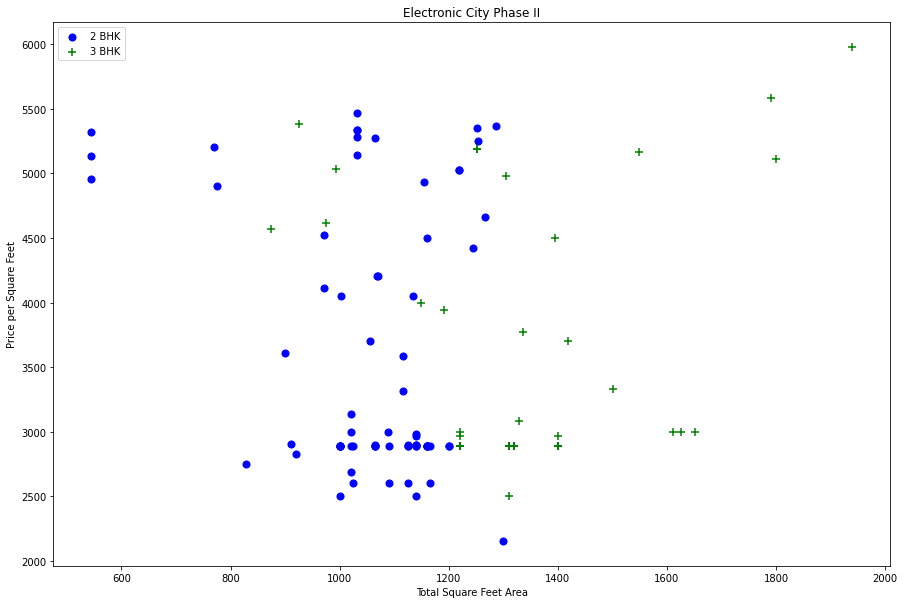

In [32]:
def plot_scatter(df, location):
    bhk2 = df.loc[(df.location==location)& (df.bhk=='2')]
    bhk3 = df.loc[(df.location==location)& (df.bhk=='3')]

    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft, color='blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft, marker='+', color='green', label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter(df8, "Electronic City Phase II")
# print(df8)

In [81]:
df8['bhk'] = pd.to_numeric(df8['bhk'])

In [83]:
def remoe_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df9 = remoe_bhk_outliers(df8)
df9.shape

(7126, 8)

In [89]:
df9['bhk'] = df9['bhk'].astype(str)

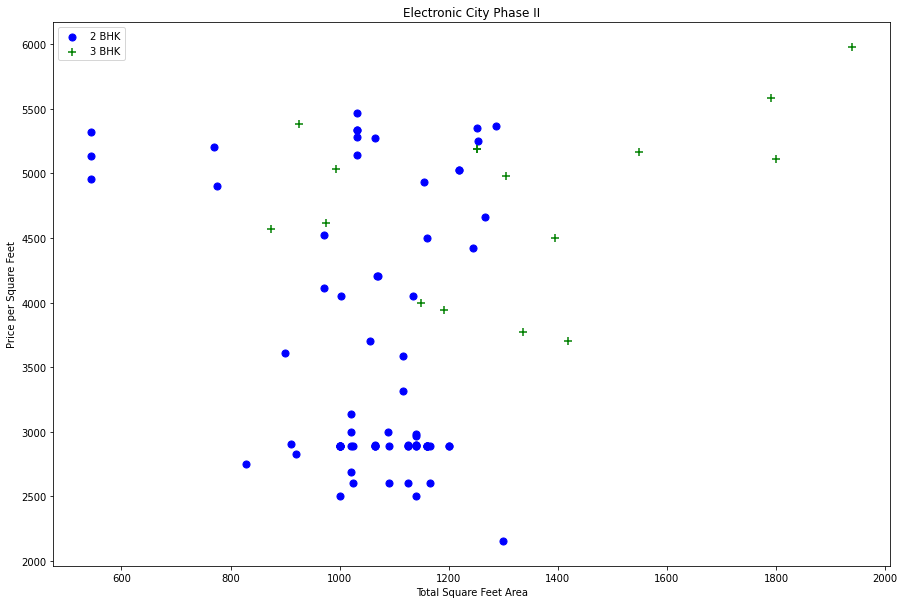

In [91]:
plot_scatter(df9, "Electronic City Phase II")

<function matplotlib.pyplot.show(*, block=None)>

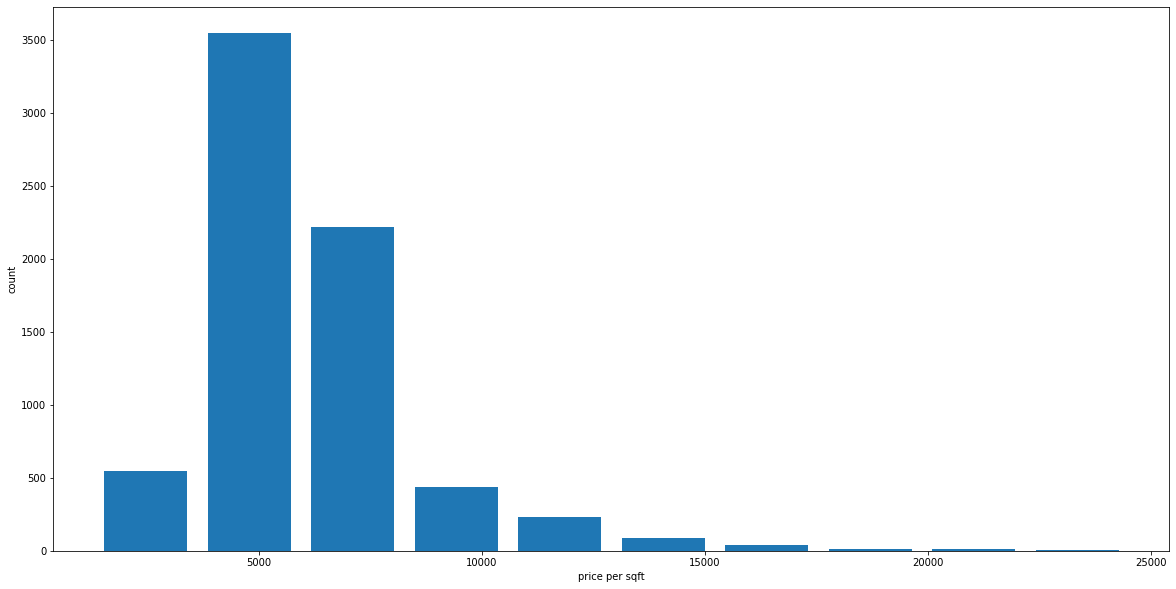

In [94]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("price per sqft")
plt.ylabel("count")
plt.show

In [108]:
df9['bhk'] = pd.to_numeric(df9['bhk'])

In [118]:
df9[df9.bath > df9.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1576,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6562,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8210,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [130]:
df10 = df9[df9.bath <= df9.bhk+2]
df10.shape

(7123, 8)

In [131]:
df9.shape

(7126, 8)

In [136]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')], axis="columns")
df11.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,2 BHK,947.0,2.0,2.0,43.0,2,4540.654699,1,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
df12 = df11.drop('location',axis='columns')
df12.head()

,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2 BHK,947.0,2.0,2.0,43.0,2,4540.654699,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
df13 = df12.drop('price_per_sqft', axis="columns")


In [149]:
df14 = df13.drop('size', axis="columns")
df14.head()

,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
X = df14.drop("price", axis="columns")
Y = df14.price

In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [159]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.8621809506858895

In [162]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.78412689, 0.87945561, 0.79774808, 0.82807936, 0.85884563])

In [169]:
def find_best_model(X, Y):
    algos = {
        'linear_regression' : {
            "model" : LinearRegression(),
            "params" : {
                "normalize" : [True, False]
            }
        },
        "lasso" : {
            "model" : Lasso(),
            "params" : {
                "alpha" : [1,2],
                "selection" : ["random", "cyclic"]
            }
        },
        "decision_tree" : {
            "model" : DecisionTreeRegressor(),
            "params" :{
                "criterion" : ["mse", "friedman_mse"],
                "splitter" : ["best", "random"]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            "model" : algo_name,
            "best_score" : gs.best_score_,
            "best_params" : gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score', 'best_params'])

find_best_model(X, Y)

,model,best_score,best_params
0,linear_regression,0.829651,{'normalize': True}
1,lasso,0.692798,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.711601,"{'criterion': 'mse', 'splitter': 'random'}"


In [176]:
 def predict_price(location, sqft, bath, bhk, balcony):
        loc_index = np.where(X.columns == location)[0][0]
        
        x = np.zeros(len(X.columns))
        x[0] = sqft
        x[1] = bath
        x[2] = bhk
        x[3] = balcony
        if loc_index >= 0:
            x[loc_index] = 1
            
        return lr.predict([x])[0]

In [186]:
predict_price("1st Phase JP Nagar",1000, 2, 2, 0)

82.97505766656482